## Import libraries

In [161]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
import umap
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Load the data

In [126]:
path_to_data_directory = '../data/'
exchange = 'binance'
coin = 'BTC'
interval = '1h'
data = pd.read_csv(path_to_data_directory + exchange + '/' + coin + '/' + interval + '.csv')
data.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
0,2024-09-17 19:00:00,60540.17,60696.48,59618.26,59967.99,2112.05320,2024-09-17 19:59:59.999,1.270612e+08,322417,881.13029,5.299674e+07,0
1,2024-09-17 20:00:00,59967.98,60342.85,59715.42,60120.00,1665.06151,2024-09-17 20:59:59.999,9.996920e+07,208296,828.74091,4.975709e+07,0
2,2024-09-17 21:00:00,60119.99,60424.25,60105.01,60334.07,662.68788,2024-09-17 21:59:59.999,3.997326e+07,85064,356.50218,2.150287e+07,0
3,2024-09-17 22:00:00,60334.07,60343.99,60122.50,60240.01,424.37655,2024-09-17 22:59:59.999,2.556103e+07,94677,173.20763,1.043171e+07,0
4,2024-09-17 23:00:00,60240.01,60324.00,60005.31,60313.99,489.52738,2024-09-17 23:59:59.999,2.945738e+07,73556,267.66050,1.610952e+07,0


## Preprocessing

split the features and target value

In [127]:
features = data.drop(columns=['Close', 'Open Time', 'Close Time'])
target = data['Close']

features.head()

,Open,High,Low,Volume,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
0,60540.17,60696.48,59618.26,2112.05320,1.270612e+08,322417,881.13029,5.299674e+07,0
1,59967.98,60342.85,59715.42,1665.06151,9.996920e+07,208296,828.74091,4.975709e+07,0
2,60119.99,60424.25,60105.01,662.68788,3.997326e+07,85064,356.50218,2.150287e+07,0
3,60334.07,60343.99,60122.50,424.37655,2.556103e+07,94677,173.20763,1.043171e+07,0
4,60240.01,60324.00,60005.31,489.52738,2.945738e+07,73556,267.66050,1.610952e+07,0


scale the features

In [128]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Dimensionality reduction using isomap and umap

Adjust the n_components and n_neighbors parameters

TODO:
Use Cross Validation with GridSearch to select the best values

In [129]:
# Isomap
isomap_transformer = Isomap(n_components=10, n_neighbors=5) # adjust n_components and n_neighbors 
isomap_features = isomap_transformer.fit_transform(scaled_features)


# Umap
umap_transformer = umap.UMAP(n_components=10, n_neighbors=5, metric='euclidean')
umap_features = umap_transformer.fit_transform(scaled_features)

## Model Training with GBR and RF

### USING ISOMAP

#### GBR

In [130]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(isomap_features, target, test_size=0.2, random_state=42)

# Gradient Boosting Regression
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print("GBR RMSE:", mean_squared_error(y_test, y_pred_gbr, squared=False))
print("GBR R^2:", r2_score(y_test, y_pred_gbr))

GBR RMSE: 345.1837922274646
GBR R^2: 0.9609407782166599


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### RF

In [131]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RF RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("RF R^2:", r2_score(y_test, y_pred_rf))

RF RMSE: 482.3944395933263
RF R^2: 0.9237170672869859


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### USING UMAP

#### GBR

In [132]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(umap_features, target, test_size=0.2, random_state=42)

# Gradient Boosting Regression
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print("GBR RMSE:", mean_squared_error(y_test, y_pred_gbr, squared=False))
print("GBR R^2:", r2_score(y_test, y_pred_gbr))

GBR RMSE: 467.93152804951984
GBR R^2: 0.9282226516037072


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### RF

In [133]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RF RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("RF R^2:", r2_score(y_test, y_pred_rf))

RF RMSE: 488.6916552790133
RF R^2: 0.9217124609502807


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Cross Validation with GridSearch

In [134]:
all_best_params = {}
all_scores = {}

#### FOR GBR

UMAP

In [135]:
def umap_gbr_gridsearch():
    global all_best_params, all_scores
    X_train, X_test, y_train, y_test = train_test_split(umap_features, target, test_size=0.2, random_state=42)

    gbr = GradientBoostingRegressor()

    # set up a param grid
    param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2, 1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(
        estimator=gbr, 
        param_grid=param_grid, 
        cv=5, 
        scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'], 
        refit = 'neg_root_mean_squared_error',
        n_jobs=-1, 
        return_train_score=True, 
        verbose=0
    )

    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Score:", -grid_search.best_score_)  # Convert to positive MSE

    # Evaluate on test data
    test_score = grid_search.score(X_test, y_test)
    print("Test Set Score (Negative MSE):", test_score)

    all_best_params['umap_gbr'] = grid_search.best_params_
    all_scores['umap_gbr'] = grid_search.cv_results_

isomap

In [136]:
def isomap_gbr_gridsearch():
    global all_best_params, all_scores
    X_train, X_test, y_train, y_test = train_test_split(isomap_features, target, test_size=0.2, random_state=42)

    gbr = GradientBoostingRegressor()

    # set up a param grid
    param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2, 1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(
        estimator=gbr, 
        param_grid=param_grid, 
        cv=5, 
        scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'], 
        refit = 'neg_root_mean_squared_error',
        n_jobs=-1, 
        return_train_score=True, 
        verbose=0
    )

    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Score:", -grid_search.best_score_)  # Convert to positive MSE

    # Evaluate on test data
    test_score = grid_search.score(X_test, y_test)
    print("Test Set Score (Negative MSE):", test_score)

    all_best_params['isomap_gbr'] = grid_search.best_params_
    all_scores['isomap_gbr'] = grid_search.cv_results_

### FOR RF

umap

In [137]:
def umap_rf_gridsearch():
    global all_best_params, all_scores
    X_train, X_test, y_train, y_test = train_test_split(umap_features, target, test_size=0.2, random_state=42)

    rf = RandomForestRegressor()

    # set up a param grid
    param_grid = {
        'n_estimators': [100, 200, 500],           # Number of trees in the forest
        'max_depth': [None, 10, 20, 30, 50],       # Maximum depth of each tree (None allows full depth)
        'min_samples_split': [2, 5, 10],           # Minimum samples required to split a node
        'min_samples_leaf': [1, 2, 4],             # Minimum samples required at a leaf node
        'max_features': [None, 'sqrt', 'log2', 0.5],  # Number of features considered at each split
        'bootstrap': [True, False]                 # Whether bootstrap samples are used
    }

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=5, 
        scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'], 
        refit = 'neg_root_mean_squared_error',
        n_jobs=-1, 
        return_train_score=True, 
        verbose=0
    )

    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Score:", -grid_search.best_score_)  # Convert to positive MSE

    # Evaluate on test data
    test_score = grid_search.score(X_test, y_test)
    print("Test Set Score (Negative MSE):", test_score)

    all_best_params['umap_rf'] = grid_search.best_params_
    all_scores['umap_rf'] = grid_search.cv_results_

isomap

In [138]:
def isomap_rf_gridsearch():
    global all_best_params, all_scores
    X_train, X_test, y_train, y_test = train_test_split(isomap_features, target, test_size=0.2, random_state=42)

    rf = RandomForestRegressor()

    # set up a param grid
    param_grid = {
        'n_estimators': [100, 200, 500],           # Number of trees in the forest
        'max_depth': [None, 10, 20, 30, 50],       # Maximum depth of each tree (None allows full depth)
        'min_samples_split': [2, 5, 10],           # Minimum samples required to split a node
        'min_samples_leaf': [1, 2, 4],             # Minimum samples required at a leaf node
        'max_features': [None, 'sqrt', 'log2', 0.5],  # Number of features considered at each split
        'bootstrap': [True, False]                 # Whether bootstrap samples are used
    }

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=5, 
        scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'], 
        refit = 'neg_root_mean_squared_error',
        n_jobs=-1, 
        return_train_score=True, 
        verbose=0
    )

    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation Score:", -grid_search.best_score_)  # Convert to positive MSE

    # Evaluate on test data
    test_score = grid_search.score(X_test, y_test)
    print("Test Set Score (Negative MSE):", test_score)

    all_best_params['isomap_rf'] = grid_search.best_params_
    all_scores['isomap_rf'] = grid_search.cv_results_

main code to run gridsearch:

!! <b>DO NOT RERUN</b> (it takes a while lol)

In [139]:
all_best_params = {}
all_scores = {}
def main():
    print("--------------------------- GBR ---------------------------")
    print("--------------------- ISOMAP FEATURES ---------------------")
    isomap_gbr_gridsearch()
    print("---------------------- UMAP FEATURES ----------------------")
    umap_gbr_gridsearch()
    print("--------------------------- RF ---------------------------")
    print("--------------------- ISOMAP FEATURES ---------------------")
    isomap_rf_gridsearch()
    print("---------------------- UMAP FEATURES ----------------------")

    umap_rf_gridsearch()
print("Do not rerun the script below this, the best parameters have been saved to all_best_params and all scores saved to all_scores")

Do not rerun the script below this, the best parameters have been saved to all_best_params and all scores saved to all_scores


In [109]:
main() # DONT RERUN

--------------------------- GBR ---------------------------
--------------------- ISOMAP FEATURES ---------------------
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 300.40086845016674
Test Set Score (Negative MSE): -352.8877389188238
---------------------- UMAP FEATURES ----------------------
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation Score: 323.9643739507518
Test Set Score (Negative MSE): -470.5704537531662
--------------------------- RF ---------------------------
--------------------- ISOMAP FEATURES ---------------------
Best Parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 343.3575892617165
Test Set Score (Negative MSE): -489.2298469476051
----------------

GBR with ISOMAP features seems to perform the best so lets further tune the hyperparameters

In [149]:
param_grid = {
    'learning_rate': [0.15, 0.2, 0.25, 0.3, 0.5],
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2]
}

X_train, X_test, y_train, y_test = train_test_split(isomap_features, target, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"First row of X_train: {X_train[0]}")
gbr = GradientBoostingRegressor()

grid_search = GridSearchCV(
    estimator=gbr, 
    param_grid=param_grid, 
    cv=5, 
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'], 
    refit = 'neg_root_mean_squared_error',
    n_jobs=1, 
    return_train_score=True, 
    verbose=1
)

grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", -grid_search.best_score_)  # Convert to positive MSE

# Evaluate on test data
test_score = grid_search.score(X_test, y_test)
print("Test Set Score (Negative MSE):", test_score)


X_train: (575, 10), y_train: (575,)
First row of X_train: [ 0.64330928  4.77435578 -0.11676429 -0.8652416  -0.78584626  0.52971348
  0.48048526  0.10013967 -0.14296754 -0.12955225]
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters: {'learning_rate': 0.25, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 200}
Best Cross-Validation Score: 301.6871493580096
Test Set Score (Negative MSE): -325.5011555208211


Add early stopping

In [166]:
gbr = GradientBoostingRegressor(
    learning_rate=0.1,        # Chosen learning rate
    max_depth=2,               # Chosen depth from best results
    n_estimators=1000,         # Start with a high number of estimators
    validation_fraction=0.1,   # 10% of training data for validation
    n_iter_no_change=10,       # Stop if no improvement for 10 rounds
    tol=0.001,                  # Minimum change to qualify as an improvement
    random_state=42            # Ensure reproducibility
)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test Set Mean Squared Error (MSE):", test_mse)
print("R² Score:", r2)

Test Set Mean Squared Error (MSE): 111326.64674982682
R² Score: 0.9635059617572362


In [167]:
print("Number of boosting stages used:", gbr.n_estimators_)

Number of boosting stages used: 77


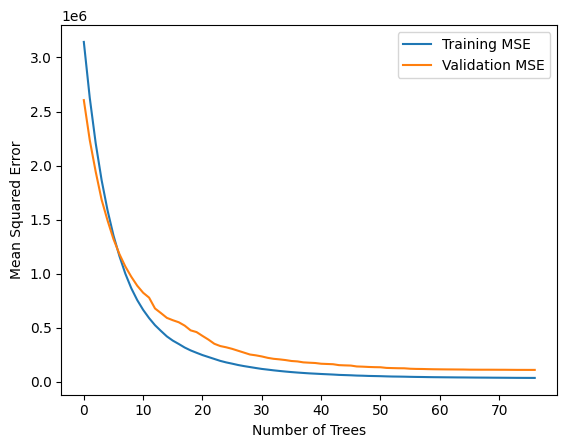

In [168]:
train_scores = []
val_scores = []

for y_train_pred, y_val_pred in zip(gbr.staged_predict(X_train), gbr.staged_predict(X_test)):
    train_scores.append(mean_squared_error(y_train, y_train_pred))
    val_scores.append(mean_squared_error(y_test, y_val_pred))

plt.plot(train_scores, label='Training MSE')
plt.plot(val_scores, label='Validation MSE')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

### Conclusion of early stopping

not good for model 
dont use early stopping